# Статистика, DS-поток
## Практическое задание 2


**Правила:**

* Дедлайн **21 сентября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 &mdash;  2 балла
* Задача 2 &mdash;  2 балла
* Задача 3 &mdash;  5 баллов
* Задача 4 &mdash; 15 баллов

**Важность задач:**

* *высокая:* задачи 1, 2, 3;
* *обычная:* задача 4.

In [2]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

---

## Задача 1. 


**1.** Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $U[0, \theta]$. Рассмотрим оценки $X_{(n)}, \frac{n+1}{n}X_{(n)}, 2\overline{X}$ параметра $\theta$.

Какие из этих оценок являются несмещенными?

**Ответ:** оценка $X_{(n)}$ &mdash; смещенная, оценки $\frac{n + 1}{n}X_{(n)}$ и $2\overline{X}$ &mdash; несмещенные.

Проведите практическое исследование несмещенности перечисленных оценок аналогично ислледованию несмещенности выборочной дисперсии в предыдущих заданиях. Разбор этой задачи для выборочной дисперсии был на лекции.

**Решение:**

In [65]:
def count_n_staticsics(X):
    '''Оценка X(n)'''
    return np.amax(X, axis=-1)

def count_unbiased_n_statistics(X):
    '''Оценка (n + 1) / n * X(n)'''
    return np.amax(X, axis=-1) * (X.shape[-1] + 1) / X.shape[-1]

def count_double_average(X):
    '''Оценка 2X ср.'''
    return 2 * np.average(X, axis=-1)

In [72]:
def build_plot(count_of_sample, size_of_sample):
    '''
    Построение графика разброса реализаций оценок и их средних значений.
    
    size_of_sample -- размер выборок
    count_of_sample -- количество генерируемых выборок
    '''    
    
    X = sps.uniform.rvs(size=(count_of_sample, size_of_sample))
    print(X.shape)
    plt.figure(figsize=(18, 4))
    Y_1 = count_n_staticsics(X)
    y = 0
    plt.scatter(Y_1, np.zeros(count_of_sample) + y, alpha=0.1, s=100, color='r', label=('оценка $X_{(n)}$'))
    plt.scatter(Y_1.mean(), y, marker='*', s=300, color='w', edgecolors='black')

    y = 0.2
    Y_2 = count_unbiased_n_statistics(X)
    plt.scatter(Y_2, np.zeros(count_of_sample) + y, alpha=0.1, s=100, color='g', label=('оценка $\\frac{n + 1}{n}X_{(n)}$'))
    plt.scatter(Y_2.mean(), y, marker='*', s=300, color='w', edgecolors='black')
    
    y = 0.4
    Y_3 = count_double_average(X)
    plt.scatter(Y_3, np.zeros(count_of_sample) + y, alpha=0.1, s=100, color='b', label=('оценка $2\\overline{X}'))
    plt.scatter(Y_3.mean(), y, marker='*', s=300, color='w', edgecolors='black')
    
    # параметры для всего графика
#     plt.xlim((0.5, 1.3))
    plt.vlines(1, -0.1, 0.5, color='r')
    plt.title(f'Размер выборки = {size_of_sample}')
    plt.yticks([])
    plt.legend()
    plt.show()

(500, 10)


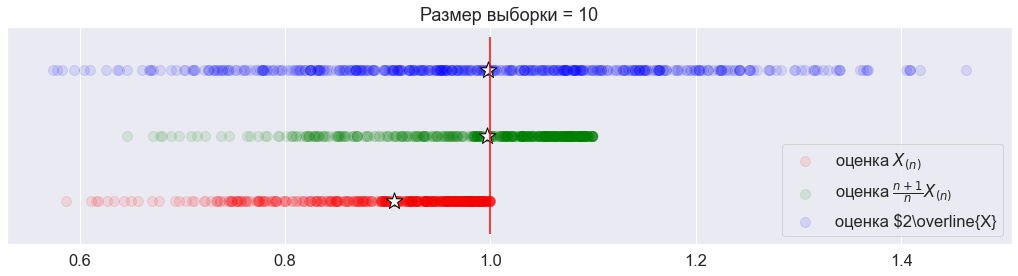

(500, 100)


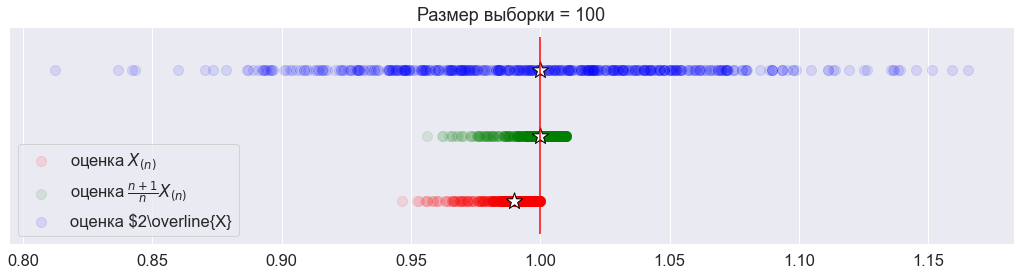

(500, 500)


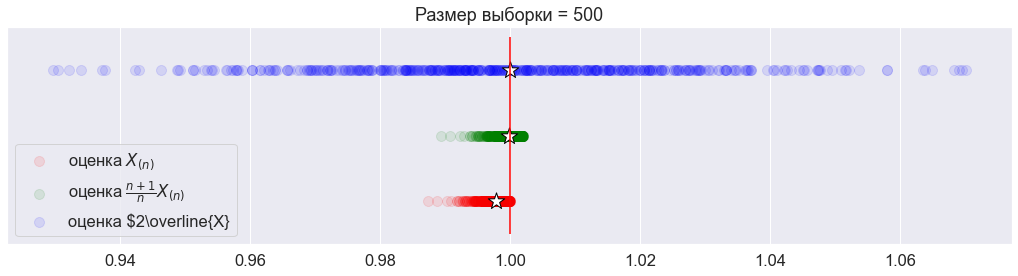

In [73]:
build_plot(500, 10)
build_plot(500, 100)
build_plot(500, 500)

**Вывод:** с поимощью графиков удалось визуализировать смещенность и несмещенность оценок. Практические результаты совпали с теоретическими. Заметим, что в случае смещенной оценки $X_{(n)}$ она при увеличении размеров выборки приближается к истинному значению $\theta$, что также соотносится с теоретическим знанием, что у этой оценки матожидание уменьшается от истинного значения на величину, убывающую по гиперболе относительно размера выборки.

---
## Задача 2.

Пусть $X_1, \ldots, X_n$ &mdash; выборка из распределения $\mathcal{N}(a, \sigma^2)$. Визуализируйте свойства состоятельности и асимптотической нормальности для оценки $S^2$ дисперсии $\sigma^2$. 

Примеры кода можно посмотреть в материалах лекций. Обязательно на графике оценок визуализируйте границы, которые задает свойство асимптотической нормальности.

**Решение:**

In [154]:
def count_cumdisp(X):
    '''Возвращает кумулятивную выборочную дисперсию'''
    print(X)
    n_range = (np.arange(X.shape[1]) + 1)  # размеры подвыборок
    n_range = n_range.reshape(1, X.shape[1])
    cumavg_X = X.cumsum(axis=-1) / n_range
    print()
    print(cumavg_X)
    cumavg_qv_X = (X ** 2).cumsum(axis=-1) / n_range
#     print()
#     print(cumavg_qv_X)
    qv_cumavg_X = cumavg_X ** 2
#     print()
#     print(qv_cumavg_X)
    return cumavg_qv_X - qv_cumavg_X

In [162]:
s = 1

def generate_sample(count_of_sample, size_of_sample, distr):
    '''Генерирует выборку указанных размеров из указанного распределения'''
    return distr.rvs(size=(count_of_sample, size_of_sample))
    

def visualizate(X, S):
    '''
    Строит график, визуализирующий асимптотические свойства
    
    X - сгенерированный массив выборок
    S - посчитанный массив кумулятивных выборочных дисперсий
    '''
    
    n_range = (np.arange(X.shape[1]) + 1)  # размеры подвыборок
    
    plt.figure(figsize=(15, 7))

    for i in range(X.shape[0]):
        plt.plot(np.arange(X.shape[1]) + 1, S[i], color='blue', alpha=0.05)
    plt.plot(n_range, s + 2 ** 1.5 * s / np.sqrt(n_range), color='red', lw=3)
    plt.plot(n_range, s - 2 ** 1.5 * s / np.sqrt(n_range), color='red', lw=3)
    plt.title('Поведение оценки для разных реализаций')
    plt.xlabel('Размер выборки')
    plt.ylim((-0.5, 2.5))
    plt.xlim((0, X.shape[1]))
    plt.show()

[[ 0.36161997 -0.8804398   1.86911443 ... -0.66495988 -1.11573788
   0.68053334]
 [ 0.12390837 -0.32076295  0.05862221 ... -0.83238075  0.71961876
  -0.1690527 ]
 [-0.43417795 -0.39127687 -1.15873651 ... -0.4460008  -0.23726117
   1.48148214]
 ...
 [ 0.73242992  0.54529363 -0.56745259 ... -0.96742707 -0.6158764
   0.91286505]
 [-1.30351895 -0.55271262 -0.86523781 ... -0.28502824 -0.45511405
  -0.10383641]
 [-1.50798023  1.37307321  1.77881971 ... -0.33335659  0.7286428
   0.10999703]]

[[ 0.36161997 -0.25940991  0.4500982  ...  0.07748092  0.07349022
   0.0755137 ]
 [ 0.12390837 -0.09842729 -0.04607746 ... -0.03892775 -0.0363908
  -0.03683301]
 [-0.43417795 -0.41272741 -0.66139711 ...  0.05684147  0.05585785
   0.06060993]
 ...
 [ 0.73242992  0.63886178  0.23675699 ...  0.01794781  0.015828
   0.01881812]
 [-1.30351895 -0.92811578 -0.90715646 ...  0.09698543  0.09513894
   0.09447569]
 [-1.50798023 -0.06745351  0.5479709  ... -0.02981935 -0.02728269
  -0.02682509]]


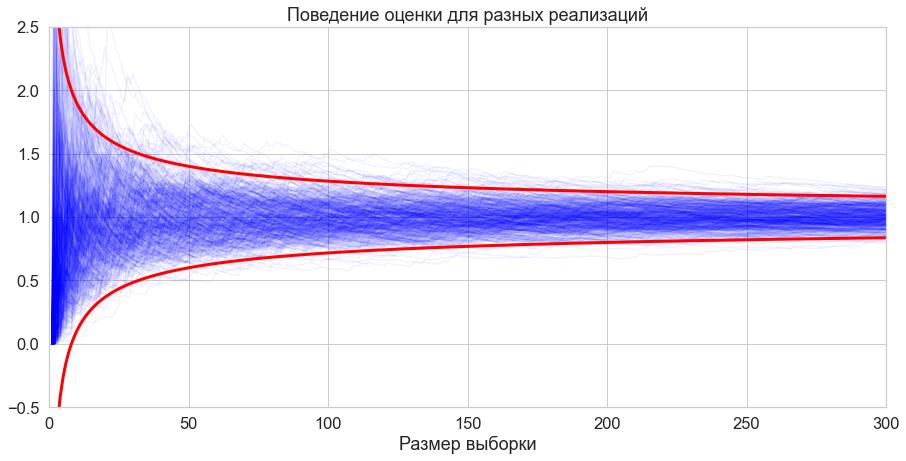

In [163]:
X = generate_sample(500, 300, sps.norm)
S = count_cumdisp(X)
visualizate(X, S)

Попробуем посмотреть, что происходит при малых размерах выборки покрупнее.

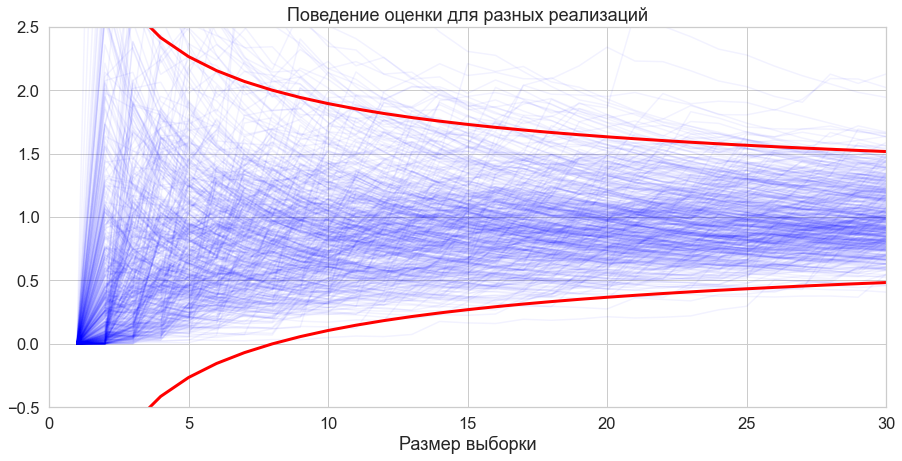

In [164]:
X_small = X[..., :30]
S_small = S[..., :30]
visualizate(X_small, S_small)

Посмотрим также как себя ведет величина из определения асимптотически нормальной оценки. Из рассчетов для нормального распределения с параметрами (0, 1) (пользуясь выкладками из номера 4 теор д/з) асимптотическая дисперсия $\sigma^2 = 2$.

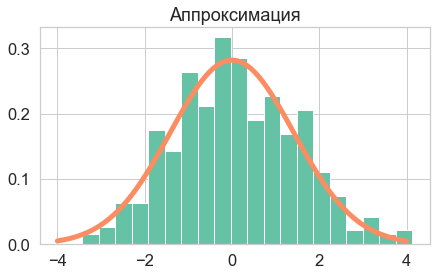

In [165]:
Zn = (S - 1) * np.sqrt(n_range)

sns.set_style('whitegrid')
grid = np.linspace(-4, 4, 100)

plt.figure(figsize=(7, 4))
plt.hist(Zn[:, -1], bins=20, density=True)
plt.plot(grid, sps.norm(0, 2 ** 0.5).pdf(grid), lw=5)
plt.title('Аппроксимация')
plt.show()

**Вывод:** Мы визуализировали оценки в зависимости от размера выборки. Посмотрим на результаты: во-первых, С ростом размера выборки траектории оценок сходятся к истинному значению параметра, об этом говорит свойство *состоятельности*. Во-вторых, на графике заметно, что почти все траектории с ростом размера выборки попадают в "коридор" $2\sigma(\theta)\left/\sqrt{n}\right.$, это показывает свойство асимптотической нормальности*. Также мы видим, что при малых размерах выборки траектории не очень хорошо попадают в коридор, что доказывает невыполнимость асимптотических свойств при малых размерах выборки. По гистограмме можно заметить, что величина из определения асимптотически нормальной оценки действительно хорошо описывается нормальным распределением с нулевым средним и дисперсией, равной асимптотической дисперсии.

___
## Задача 3.

Пусть случайная величина $X$ имеет нормальное распределение с параметрами $(a, \sigma^2)$, то есть:
$$
X \sim \mathcal{N}(a, \sigma^2)
$$
Рассмотрим следующую задачу оптимизации:
$$
f(X) = (\mathsf{E}X-1)^2 + (\mathsf{D}X - 1)^2 \longrightarrow \min_{a, \sigma^2}
$$
В данном случае правильный ответ мы можем легко найти непосредственно, однако в реальности возникают гораздо более сложные функции, и решить задачу напрямую руками не представляется возможным. Для решения таких задач применяются различные градиентные методы, такие как, например, стохастический градиентный спуск. Оказывается, что в нём критически важно использовать несмещенные оценки градиента.

*Замечание.* Если смещение заключается только в том, что математическое ожидание оценки отличается от вектора градиента домножением каждой компоненты на одну и ту же константу, то проблем нет &mdash; все равно мы используем шаг градиента.

В данной задаче вам предлагается на примере простой функции убедиться, насколько важным оказывается использовать несмещенные оценки в итерационных процедурах.

**Решение:**

Запишите оптимальные значения параметров $a$ и $\sigma^2$, а также шаг простого градиентного спуска для минимизации определенной выше функции $f(X)$:

Оптимальные значения: $a = EX = 1$, $\sigma^2 = DX = 1$. <br>
Шаг градиентного спуска: $a_{t + 1} = a_{t} - \eta \cdot (a_t - 1)$, $\sigma^2_{t + 1} = \sigma^2_{t} - \eta \cdot (\sigma^2_t - 1)$

Реализуйте метод простого градиентного спуска для выше описанной задачи оптимизации. Для каждой итерации сохраните текущие значения среднего и дисперсии, постройте график зависимости значений $a$ и $\sigma^2$ от шага процедуры. Наблюдается ли сходимость к оптимальным параметрам?

In [322]:
f = lambda x, y: (x - 1) ** 2 + (y - 1) ** 2

In [323]:
def gradient_descent(eps, eta):
    a_0, sigma_0 = sps.norm(0, 1).rvs(size = 2)
    a = np.array([a_0])
    sigma = np.array([sigma_0])
    while f(a[-1], sigma[-1]) >= eps:
        cur_a = a[-1] - eta * (a[-1] - 1)
        a = np.append(a, cur_a)
        cur_sigma = sigma[-1] - eta * (sigma[-1] - 1)
        sigma = np.append(sigma, cur_sigma)

    return a, sigma

In [324]:
def draw_plot_of_descent(a, sigma, shift=0):
    plt.figure(figsize=(15, 15))
    plt.subplot(2, 1, 1)
    plt.plot(np.arange(len(a)) + shift, np.abs(a - 1), 'b')
    plt.title('Зависимость отклонения оценки от истинного значения от номера шага спуска')
    plt.xlabel('Номер шага спуска')
    plt.ylabel('Отклонение оценки $a$')
    plt.subplot(2, 1, 2)
    plt.plot(np.arange(len(sigma)) + shift, np.abs(sigma - 1), 'r')
    plt.xlabel('Номер шага спуска')
    plt.ylabel('Отклонение оценки $\sigma^2$')
    plt.show()

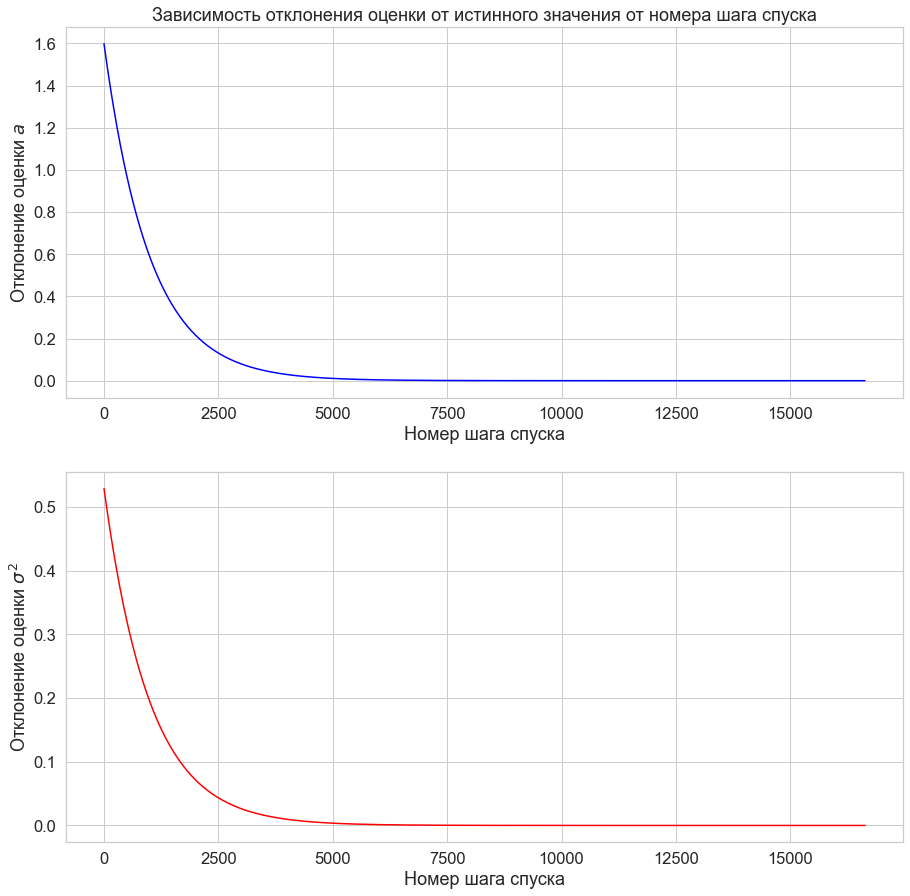

In [370]:
eps = 1e-14
eta = 1e-3

a, sigma = gradient_descent(eps, eta)
draw_plot_of_descent(a, sigma)

Посмотрим покрупнее, что происходит на больших шагах.

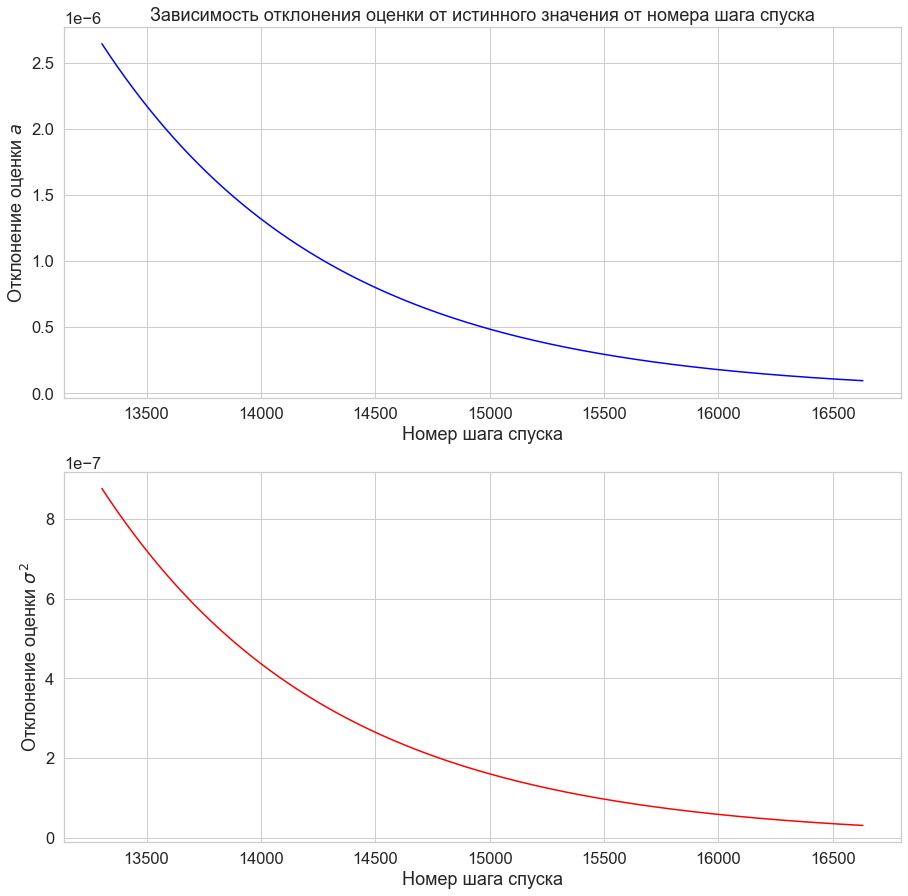

In [371]:
shift = int(4 * len(a) / 5)
a = a[shift:]
sigma = sigma[shift:]
draw_plot_of_descent(a, sigma, shift)

Теперь предположим, что мы хотим оценить градиент стохастически. Например, давайте текущие значения среднего и дисперсии оценивать изученным ранее методом Монте-Карло. А именно, каждый раз мы будем генерировать выборку размера 5 из нормального распределения с текущими значениями параметров и далее по ней оценивать градиент.
Для оценки математического ожидания ипользуйте несмещенную оценку, а для дисперсии &mdash; смещенную. 

Реализуйте описанный выше подход. Как и прежде, изобразите текущие значения параметров в зависимости от итерации. Сошлась ли такая процедура к оптимальным значениям?

In [330]:
def stohastic_gradient_descent(eps, eta, ddof):
    a_0, sigma_0 = sps.norm(0, 1).rvs(size = 2)
    sigma_0 = abs(sigma_0)
    a = np.array([a_0])
    sigma = np.array([sigma_0])
    while f(a[-1], sigma[-1]) >= eps:
        X = sps.norm(a[-1], sigma[-1]).rvs(size=5)
        cur_mean = np.mean(X)
        cur_var = np.var(X, ddof=ddof)
        cur_a = a[-1] - eta * (cur_mean - 1)
        a = np.append(a, cur_a)
        cur_sigma = sigma[-1] - eta * (cur_var - 1)
        sigma = np.append(sigma, cur_sigma)

    return a, sigma

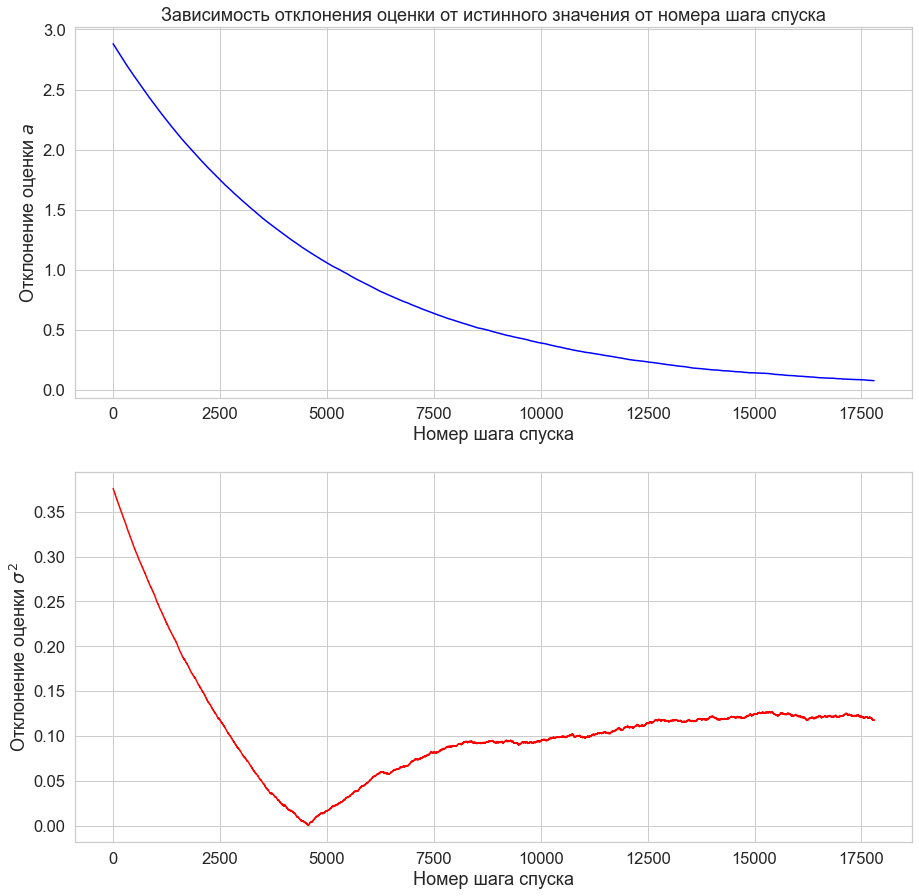

In [367]:
a, sigma = stohastic_gradient_descent(2e-2, 2e-4, 0)
draw_plot_of_descent(a, sigma)

Посмотрим покрупнее, что происходит на больших шагах.

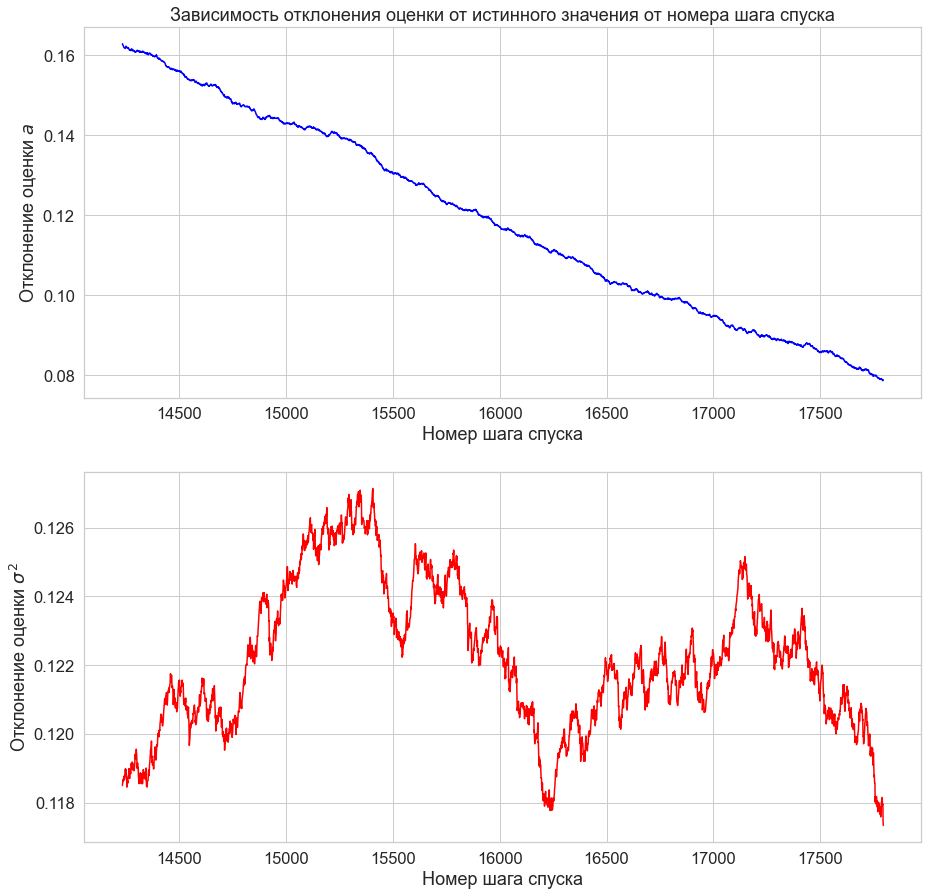

In [368]:
shift = int(4 * len(a) / 5)
a = a[shift:]
sigma = sigma[shift:]
draw_plot_of_descent(a, sigma, shift)

Теперь изменим нашу процедуру, взяв несмещенную оценку для дисперсии. Обратите внимание на параметр `ddof` в функции `np.var`. Поменялся ли результат?

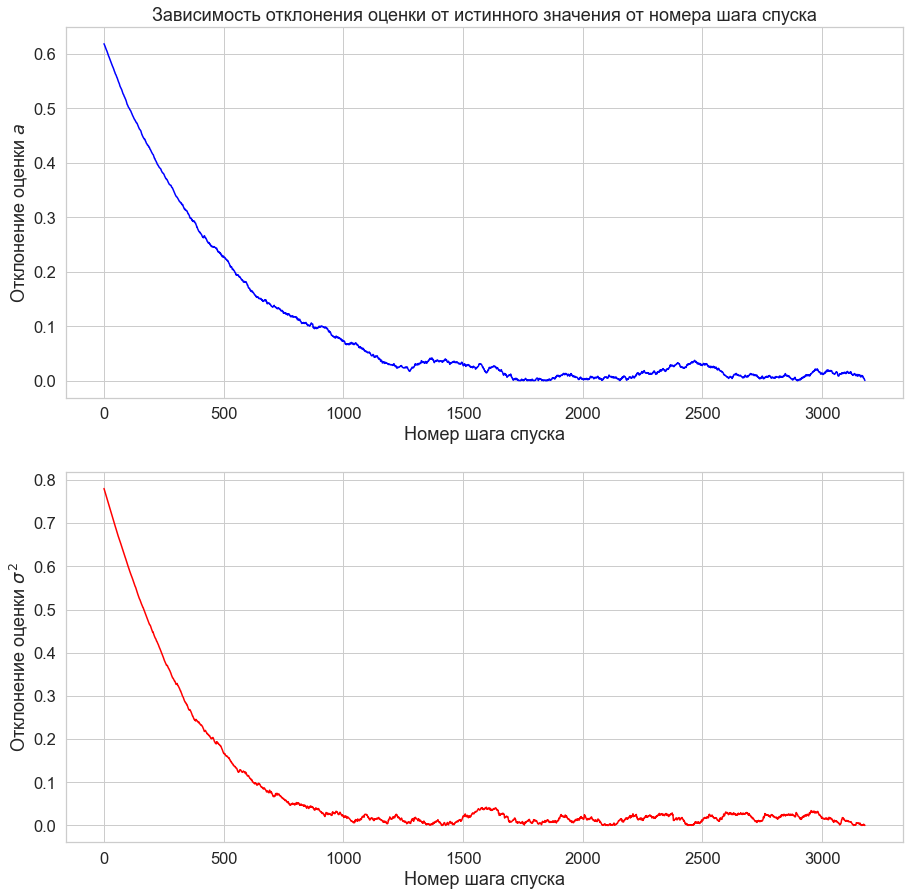

In [355]:
a, sigma = stohastic_gradient_descent(1e-6, 2e-3, 1)
draw_plot_of_descent(a, sigma)

Посмотрим покрупнее, что происходит на больших шагах.

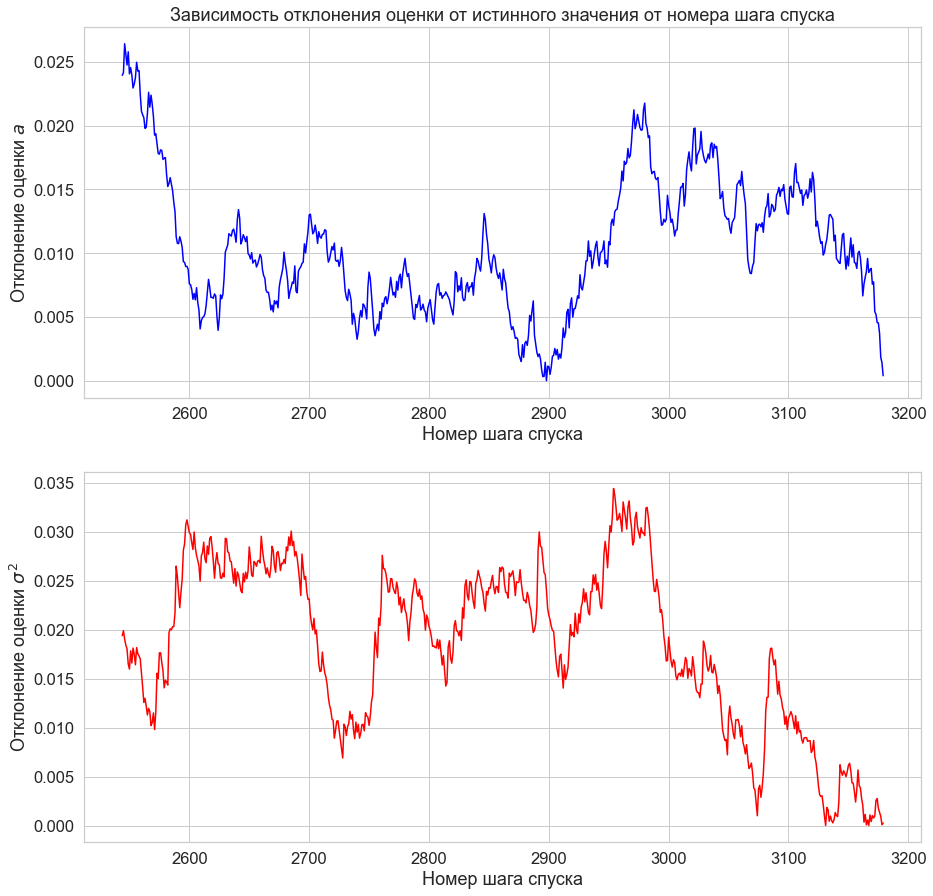

In [356]:
shift = int(4 * len(a) / 5)
a = a[shift:]
sigma = sigma[shift:]
draw_plot_of_descent(a, sigma, shift)

**Вывод:** как мы видим, если у нас известно распределение с параметрами, и нам ничего не нужно генерировать, то градиентный спуск работает на ура, и нет никаких проблем с тем, что мы в какой-то момент просто начинаем удаляться от минимума. Если пользоваться смещенной оценкой, то как видно из графиков, параметры не могут синхронизироваться и могут двигаться в разные стороны (один почти монотонно к минимуму, а второй почти монотонно от минимума), из-за этого приблизить к оптимальному значению параметров лучше, чем с точностью 0.02 не удалось (всегда случались неприятные генерации, когда было невозможно). Если же пользоваться несмещенной оценкой, то как видно из графиков, параметры довольно быстро пришли близко к минимуму и там уже ведут себя довольно случайным образом (так как в генерации присутствует вклад случайности, а при уменьшении $\eta$ приближение требует огромного количества итераций, что невозможно ввиду постоянной генерации случайных величин, занимающей большое время). В этом случае удалось приблизить интересующую нас функцию с точностью $10^{-6}$.

___
## Задача 4.
В заключение вам предлагается реальная практическая задача.

На основе http://ecsocman.hse.ru/data/819/759/1219/Monte_Karlo_dlya_analitikov.pdf
 	
Рассмотрим проект по разработке нефтяного месторождения. В основе модели проекта лежат предварительные данные о величине резервов месторождения.

*Замечание.* Знания физики или экономики не требуются.



*Формулировка задачи от заказчика:*
Общая задача анализа &mdash; основываясь на величине запасов и проценте нефтеотдачи рассчитать NPV (чистая приведенная стоимость) проекта, а точнее, $0.1$-квантиль ее распределения.
Следующим этапом мы хотим использовать ее в качестве критерия оптимизации, то есть максимизировать такое значение NPV, которого мы можем достигнуть или превысить с $90\%$-й вероятностью, подобрав при этом оптимальное количество скважин на месторождении.



Предположим, что на месторождении есть $n$ скважин. Эти скважины добывают некоторую смесь, которая состоит из воды, нефти и различных примесей. Доля нефти из добытого материала называется <a href="https://ru.wikipedia.org/wiki/Нефтеотдача">коэффициентом нефтеотдачи</a> $k$. Мы будем считать, что этот коэффициент является одинаковым для всего месторождения и имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$.




**Добыча нефти скважиной за год**

<a href="http://vseonefti.ru/upstream/stadii-razrabotki.html">Разработка месторождения</a> включает три этапа:
1. фаза роста добычи &mdash; период введения в работу новых скважин;
2. фаза плато: после достижения определенного уровня добычи, она некоторое время продолжается на постоянном уровне;
3. фаза снижения добычи &mdash; период, когда темпы добычи экспоненциально снижаются с течением времени.


Для упрощения задачи мы пропустим два первых этапа и рассмотрим только последний.


Каждая скважина $j$ характеризуется параметром $q_j$ &mdash; темп добычи из скважины, определяемый объемом вещества (смесь нефти, воды и др.), добываемого скважиной за сутки. Будем считать, что этот параметр является одинаковым для скважины в течении всего периода разработки и имеет нормальное распределение со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей. Темпы добычи для разных скважин считаются независимыми случайными величинами.

Соответственно, за год $t$ скважина добывает $Q_{tj} = 365 \cdot k \cdot q_j \cdot e^{-0.008 \cdot n \cdot (t-1)}$ тыс. баррелей нефти, где экспонента отвечает за снижение добычи с течением времени.
Всего за год $t$ на месторождении добывается $Q_t = \sum\limits_{j=1}^{n} Q_{tj}$ тыс. баррелей нефти.




**Прибыль**

Стоимость барреля нефти будем считать постоянной и равной $c = 70$ долларов за баррель. Однако, для расчета стоимости нужно учесть <a href="https://ru.wikipedia.org/wiki/Ставка_дисконтирования">ставку дисконтирования</a> &mdash; процентная ставка, используемая для пересчета будущих потоков доходов в единую величину текущей стоимости (см. формулу далее). Обозначим ее $i$ и будем считать, что она имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$.

Стоимость добытой нефти за год $t$ составит (тыс. баррелей)
$$\frac{c \cdot Q_t}{(1+i)^{t-1}}.$$

Будем считать, что разработка месторождения прекращается, если за год на всем месторождении было добыто менее $100$ тыс. баррелей нефти. Последний год разработки обозначим $T$.




**Затраты**

Затраты на месторождение (кроме скважин) составляют $C_{\text{мест.}} = 200$ млн. долларов в год. Будем считать, что издержки на содержание скважины $j$ за весь период разработки имеют треугольное распределение (<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.triang.html">scipy.stats.triang</a>) c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов. Обозначим эти случайные величины $C^j_{\text{скв.}}$ и будем считать их независимыми.




**NPV**

Теперь мы можем написать формулу NPV
$$NPV = \sum\limits_{t=1}^T \frac{c \cdot Q_t}{(1+i)^{t-1}} - T \cdot C_{\text{мест.}} - \sum\limits_{j=1}^{n} C^j_{\text{скв.}}.$$




**Задание**

С помощью метода Монте-Карло требуется найти число $x$, при котором $$\mathsf{P}(NPV < x) = 0.1.$$

Количество итераций метода должно быть не менее $100\ 000$. На основе проделанных итераций оцените также среднее значение NPV и вероятность, с которой NPV будет положительна. Кроме того, постройте нормированную гистограмму значений NPV с помощью `plt.hist(values, bins=200, density=True)`.



Перечислим еще раз все *случайные величины*:
* Коэффициент нефтеотдачи $k$ имеет нормальное распределение со средним $42\%$ и стандартным отклонением $1.2\%$;
* $q_1, ..., q_{n}$ &mdash; темпы добычи из скважин &mdash; независимые нормальные случайные величины со средним $10$ тыс. баррелей и стандартным отклонением $3$ тыс. баррелей;
* Ставка дисконтирования $i$ имеет нормальное распределение со средним $10\%$ и стандартным отклонением $1.2\%$;
* $C^1_{\text{скв.}}, ..., C^{n}_{\text{скв.}}$ &mdash; затраты на каждую скважину &mdash; независимые  случайные величины, имеющие треугольное распределение c минимальным значением $90$ млн. долларов, максимальным значением $120$ млн. долларов и модой (наиболее вероятное значение) $100$ млн. долларов (используйте `sps.triang(loc=90, c=1/3, scale=30)`).

Параметры считать независимыми.

*Фиксированные параметры*:
* $n = 25$ скважин;
* $365$ дней в году;
* $c=70$ долларов за баррель &mdash; стоимость нефти;
* $100$ тыс. баррелей &mdash; объем добытой нефти за год, при котором разработка месторождения прекращается;
* $200$ млн. долларов в год &mdash; затраты на месторождение.

*Замечания по решению*:
* Все случайные величины надо сгенерировать заранее, до вычисления значений $T$.
* Не стоит выводить явную формулу для $T$, используйте цикл по годам.
* Запрещается использовать цикл по количеству элементов в выборке.

**Решение:**

In [414]:
n = 25
c = 7e-5
days = 365
Q_min = 1e5
C_mest = 200

NPV_arr = np.array([])

for xyz in range(int(1e5)):
    k = sps.norm(0.42, 0.012).rvs(size=1)[0]
    q = sps.norm(1e4, 3e3).rvs(size=n)
    i = sps.norm(0.1, 0.012).rvs(size=1)[0]
    C_skv = sps.triang(loc=90, c=1/3, scale=30).rvs(size=n)
    exp = 1
    NPV = -np.sum(C_skv)
    t = 1

    while True:
        exp = np.e ** (-0.008 * 25 * (t - 1))
        Q_t = days * k * q * exp
        Q_t = np.sum(Q_t)
        NPV += c * Q_t / ((1 + i) ** (t - 1))
        NPV -= 200
        if Q_t < Q_min:
            NPV_arr = np.append(NPV_arr, NPV)
            break
        t += 1
    
NPV_arr

array([2315.24516061, 1074.12304856, 2468.80075926, ..., 1099.14551629,
       2120.28990432, 3277.66231884])

In [415]:
quantile = np.quantile(NPV_arr, 0.1)
mean = np.mean(NPV_arr)
NPV_greater_0 = NPV_arr[NPV_arr > 0]
p_greater_0 = len(NPV_greater_0) / len(NPV_arr)
quantile, mean, p_greater_0

(740.1895735636384, 1680.4521442499665, 0.99328)

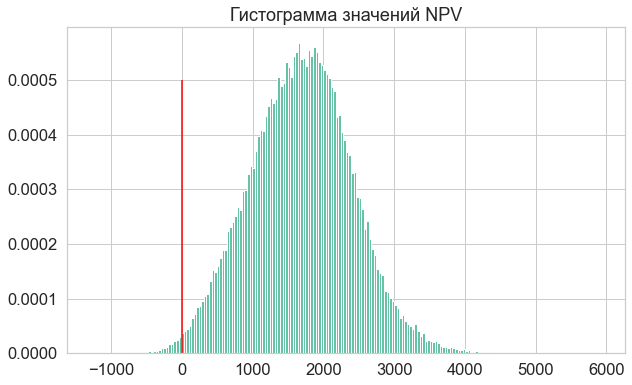

In [416]:
sns.set_style('whitegrid')
grid = np.linspace(-4, 4, 100)

plt.figure(figsize=(10, 6))
plt.hist(NPV_arr, bins=200, density=True)
plt.vlines(0, 0, 0.0005, color='r')
plt.title('Гистограмма значений NPV')
plt.show()

**Вывод:** как видно из проведенных исследований, проект довольно выгодный и, скорее всего, окупится, поэтому в реальной жизни его бы, скорее всего, приняли. Среднее значение прибыли по модели NPV получилось -1680 млн. долларов, при этом есть шанс как прогореть (уйти в минус на не более 500 млн. долларов, но шанс этого меньше процента), так и получить огромную прибыль (более 3000 млн. долларов). Вероятность выйти в плюс примерно равна 0.993, то есть, в этой модели можно заработать почти всего, в примерно в 99.3% случаях. При этом у нас нет свободных параметров, которые мы можем изменять, улучшая модель (например, как было написанно в статье, предложенной к изучению, можно было максимизировать 0.1-квантиль, изменяя некоторые параметры), поэтому мы можем делать выводы только при фиксированных параметрах.